<a href="https://colab.research.google.com/github/renya1993/Learning/blob/main/%E5%A4%9A%E3%82%AF%E3%83%A9%E3%82%B9%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多クラスロジスティック回帰の実装
### **今回のデータの設定**
*   入力2、出力3の3クラス分類
*   各クラスのデータは、正規分布に従うサンプルデータ群を生成
* 各クラスのデータ数は、100。全データ数は、300。

### **目的**
入力したデータが、３つのうちのどのクラス分類されるのかを予測するモデルを作成する。


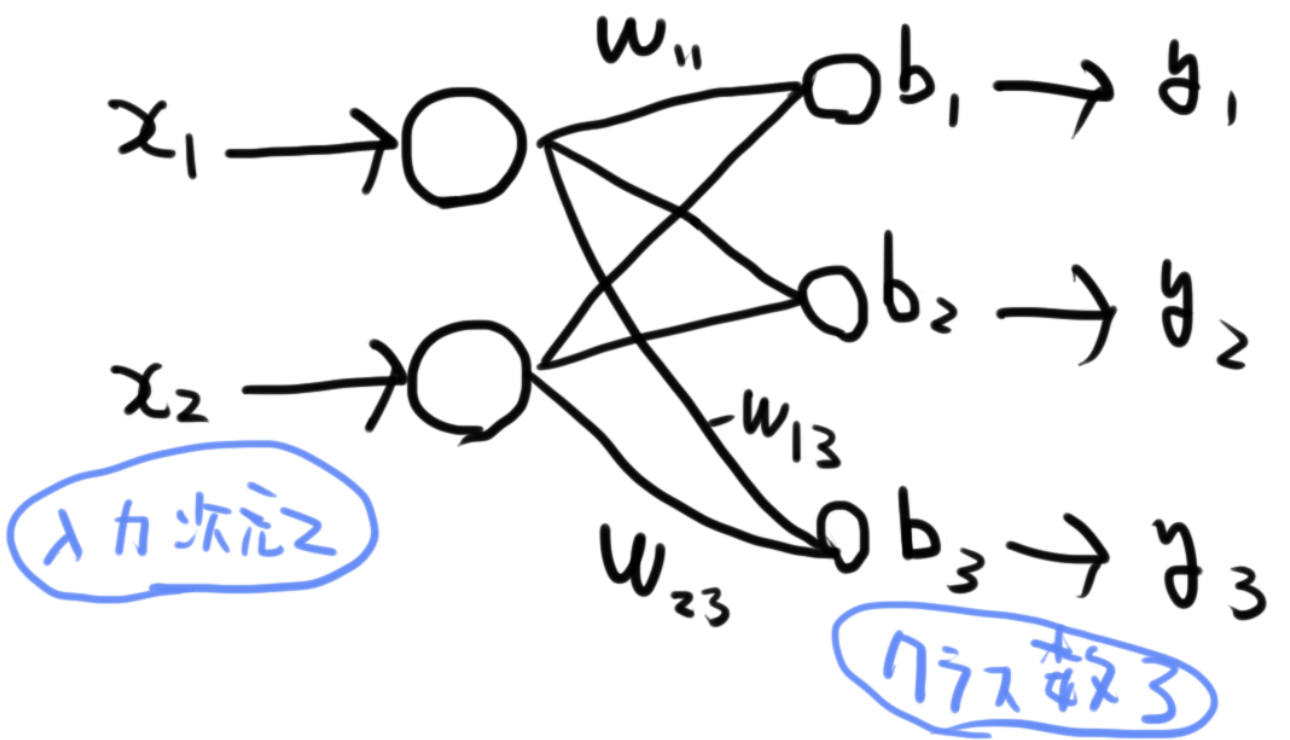

 ### **数式化**

kをクラスとすると、
$$y_k = f(w_{k1}x_1+w_{k2}x_2+w_{k3}x_3+b_k) ,k=1or2or3$$
$$y_k = \vec{w}_k^{\mathrm{T}}\vec{x}+b_k$$
と表せる。なお、fは、ソフトマックス関数

### **最尤推定**

入力したデータが、それぞれのクラスにどのように分類されるのかを考えていきます。

まず、出力がどんな関数になるのか調べるためにsoftmax関数に、y_kを代入します。

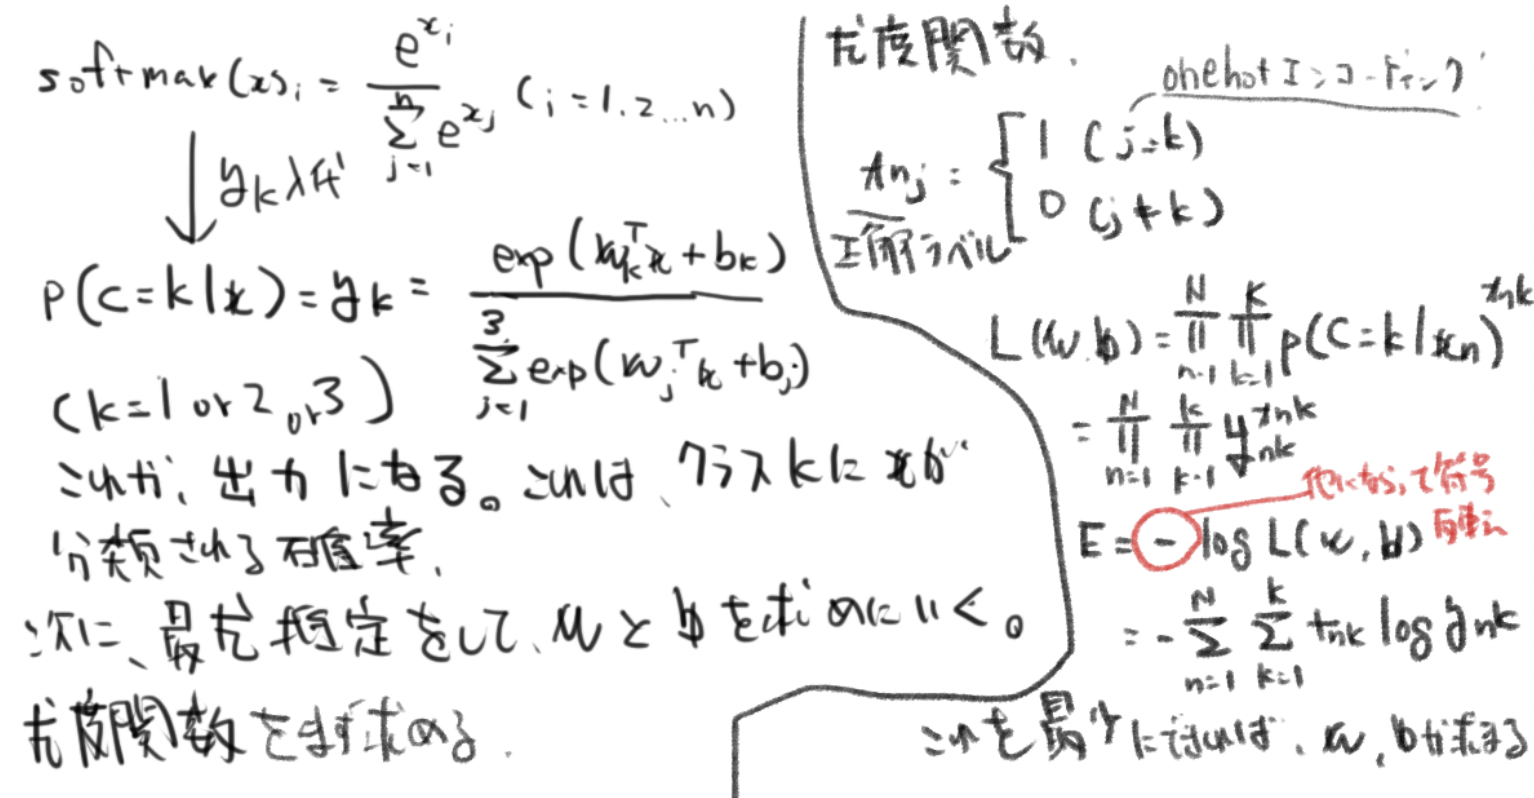

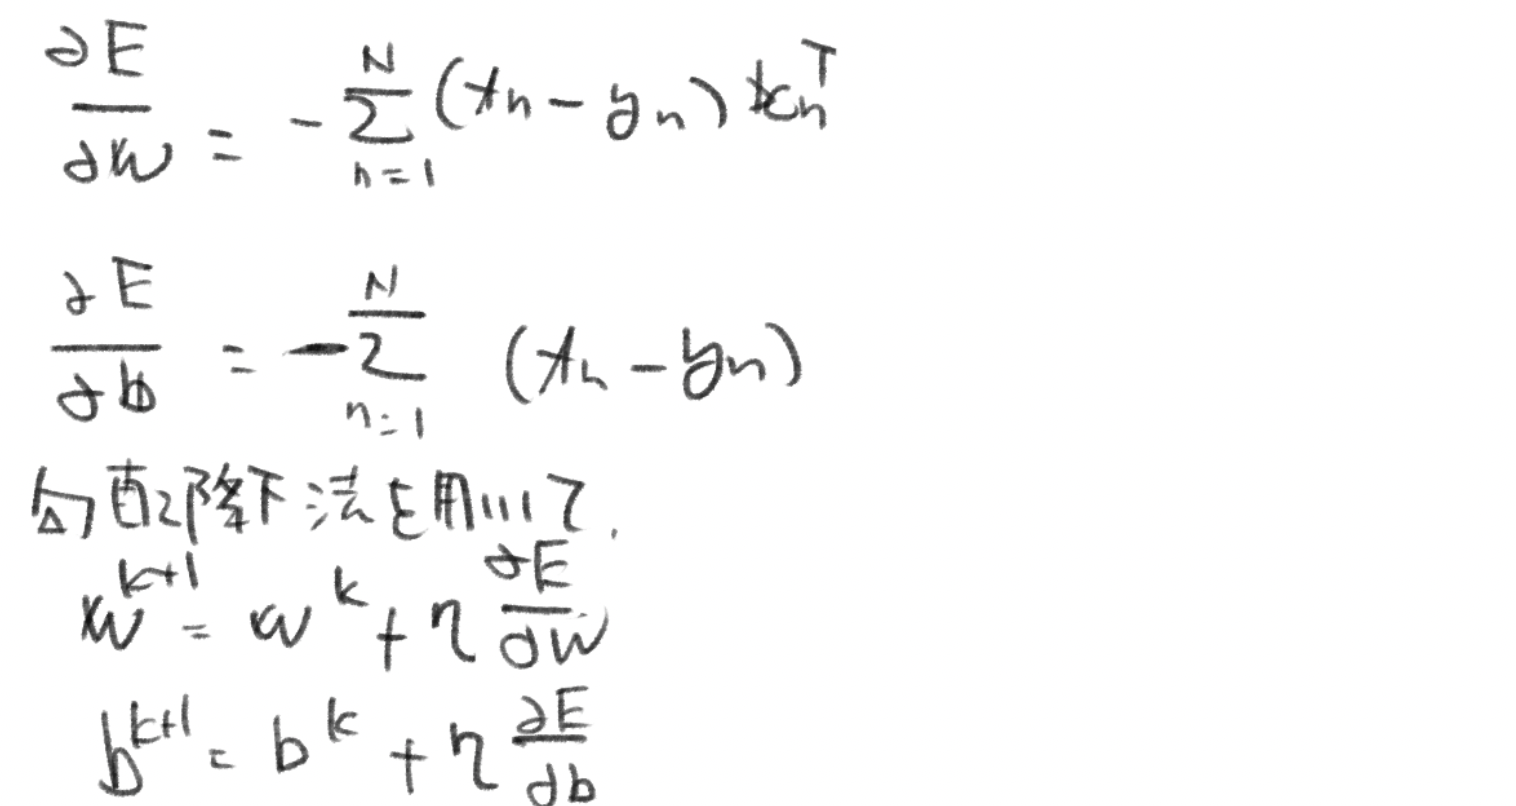

### **実装**


In [76]:
import numpy as np

In [77]:
#データの準備

"""
定数の設定
"""
#入力データの次元
M=2 
#クラス数
K=3
#クラス毎のデータ数
n=100
#全データ数
N=n*K

"""
入力の作成
"""

x1 = np.random.randn(n,M)+np.array([0,10])
x2 = np.random.randn(n,M)+np.array([5,5])
x3 = np.random.randn(n,M)+np.array([10,0])
x = np.concatenate((x1,x2,x3),axis=0)  

"""
教師データの作成
"""

t1 = np.array([[1,0,0] for i in range(n)])
t2 = np.array([[0,1,0] for i in range(n)])
t3 = np.array([[0,0,1] for i in range(n)])
t = np.concatenate((t1,t2,t3),axis=0)

"""
確認
"""

print("xの5行目まで")
print(x[:3])
print("xの形")
print(x.shape)

print("tの5行目まで")
print(t[:3])
print("tの形")
print(t.shape)


xの5行目まで
[[-0.10100072  9.35025826]
 [-1.02083822 12.22696847]
 [-1.2936508   8.35321253]]
xの形
(300, 2)
tの5行目まで
[[1 0 0]
 [1 0 0]
 [1 0 0]]
tの形
(300, 3)


In [78]:
import numpy as np
from sklearn.utils import shuffle


class LogisticRegression(object):
    '''
    （多クラス）ロジスティック回帰
    '''
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        #input_dim=2 output_dim=3  ここを合わせないと、行列積できない。
        #(300,2)@(2,3) = (300,3)になる。
        self.W = np.random.normal(size=(input_dim, output_dim))
        #bなので、outputのyと同じ配列にする必要がある。
        self.b = np.zeros(output_dim)

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        return softmax(np.matmul(x, self.W) + self.b)

    def compute_gradients(self, x, t):
        y = self.forward(x)
        delta = y - t
        #x.Tにしないと、(300,2)*(300,3)となってしまい、計算できない。
        #(2,300)*(300,3)にして、(2,3)の行列にする必要あり。
        dW = np.matmul(x.T, delta)
        db = np.matmul(np.ones(x.shape[0]), delta)

        return dW, db


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

In [79]:
if __name__ == '__main__':
    np.random.seed(123)

    '''
    2. モデルの構築
    '''
    #inputdimentionは、
    model = LogisticRegression(input_dim=M,
                               output_dim=K)

    '''
    3. モデルの学習
    '''
    def compute_loss(t, y):
      #sum(axis=1)で、列方向に対して全て足し合わせる。Σの代わり。
      #なぜ、meanにするのかと言うと、全体の数で割ってるため。
      #平均=Σn/N なぜ割るのかと言うと、誤差が大きくなりすぎないようにするため。
        return (-t * np.log(y)).sum(axis=1).mean()

    def train_step(x, t):
        dW, db = model.compute_gradients(x, t)
        model.W = model.W - 0.1 * dW
        model.b = model.b - 0.1 * db
        loss = compute_loss(t, model(x))
        return loss

    epochs = 10
    batch_size = 50
    n_batches = x.shape[0] // batch_size

    for epoch in range(epochs):
        train_loss = 0.
        x_, t_ = shuffle(x, t)

        for n_batch in range(n_batches):
          #start:0,50,100,150,200,250
            start = n_batch * batch_size
          #end:50,100,150,200,250,300
            end = start + batch_size
            #一つ一つやると、計算時間めっちゃかかるので、
            #バッチ数にわけて計算してる
            train_loss += train_step(x_[start:end],
                                     t_[start:end])
        if epoch % 10 == 0 or epoch == epochs - 1:
            print('epoch: {}, loss: {:.3f}'.format(
                epoch+1,
                train_loss
            ))

    '''
    4. モデルの評価
    '''
    x_, t_ = shuffle(x, t)
    preds = model(x_[0:5])
    classified = \
        np.argmax(t_[0:5], axis=1) == np.argmax(preds[0:5], axis=1)
    print('Prediction matched:', classified)

epoch: 1, loss: 82.253
epoch: 10, loss: 0.000
Prediction matched: [ True  True  True  True  True]


In [80]:
print("w",model.W)
print("b",model.b)

w [[-16.75680346   3.71063718  13.24085963]
 [ 16.57638193   7.76581626 -24.77565661]]
b [ 0.20203039  1.14168329 -1.34371368]


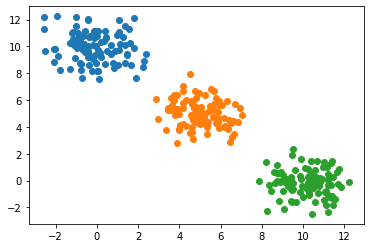

In [89]:
import matplotlib.pyplot as plt

plt.scatter(x1[:,0],x1[:,1])

plt.scatter(x2[:,0],x2[:,1])

plt.scatter(x3[:,0],x3[:,1])